## Exercise

1. In the penguins dataset, do a linear regression between the ```flipper_length_mm``` and ```body_mass_g``` features and plot the result. You might run into an error: carefully read the error and try to fix the problem.

In [193]:
import pandas as pd
penguins = pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv')

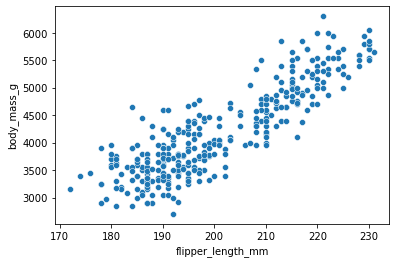

In [194]:
sns.scatterplot(data=penguins, x='flipper_length_mm', y='body_mass_g');

In [195]:
from sklearn import linear_model

In [196]:
model = linear_model.LinearRegression()
X = penguins[['flipper_length_mm']]
y = penguins['body_mass_g']
model.fit(X=X, y=y);

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

We need to drop the NA values:

In [200]:
penguins = penguins.dropna()

model = linear_model.LinearRegression()
X = penguins[['flipper_length_mm']]
y = penguins['body_mass_g']
model.fit(X=X, y=y);

In [201]:
X_pred = pd.DataFrame({'flipper_length_mm': np.arange(170,240)})
y_pred = model.predict(X_pred)

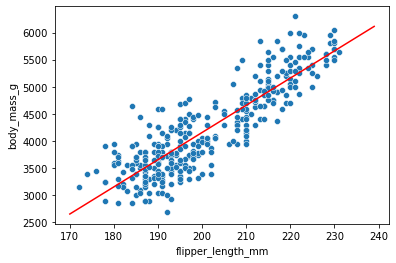

In [202]:
sns.scatterplot(data=penguins, x='flipper_length_mm', y='body_mass_g');
sns.lineplot(x=X_pred.flipper_length_mm, y=y_pred, color='r');

2. Do again a linear regression but this time add a polynomial feature (e.g. 2)

In [224]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_3 = poly.fit_transform(penguins[['flipper_length_mm']])

In [225]:
model = linear_model.LinearRegression()
y = penguins['body_mass_g']
model.fit(X=X_3, y=y);

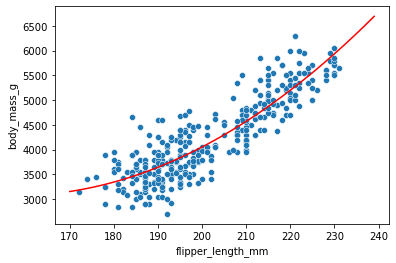

In [226]:
X_pred = poly.fit_transform(np.arange(170,240).reshape(-1,1))
y_pred = model.predict(X_pred)

sns.scatterplot(data=penguins, x='flipper_length_mm', y='body_mass_g');
sns.lineplot(x=X_pred[:,1], y=y_pred, color='r');

3. Subselect the Gentoo species and run a logistic regression to classify penguins as male/female based on the ```body_mass_g``` feature. Use the ```liblinear``` solver option.

In [319]:
gentoo = penguins[penguins.species == 'Gentoo']

In [320]:
from sklearn import linear_model
model = linear_model.LogisticRegression(solver='liblinear')
model.fit(gentoo[['body_mass_g']]/1, gentoo.sex)

LogisticRegression(solver='liblinear')

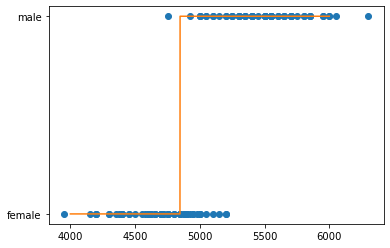

In [321]:
plt.plot(gentoo.body_mass_g/1, gentoo.sex, 'o')
plt.plot(np.arange(4000,6000)/1, model.predict(pd.DataFrame({'body_mass_g': np.arange(4000,6000)/1})));

4. Try to cluster the ```flipper_length_mm``` vs ```bill_length_mm``` features using ```SpectralClustering``` with 3 clusters. Do the cluster first without then with applying the standard scaler to the input

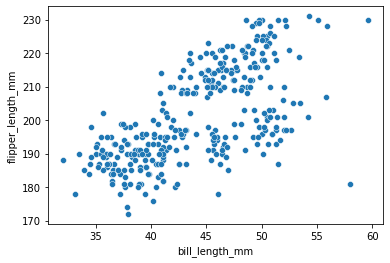

In [554]:
sns.scatterplot(data=penguins, x='bill_length_mm', y='flipper_length_mm');

In [555]:
from sklearn import cluster, preprocessing

In [559]:
cls = cluster.SpectralClustering(3)

In [560]:
X = penguins[['bill_length_mm', 'flipper_length_mm']]
cls.fit(X=X)
X['label'] = pd.Categorical(cls.labels_)

/var/folders/mk/632_7fgs4v374qc935pvf9v00000gn/T/ipykernel_70861/1652611645.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['label'] = pd.Categorical(cls.labels_)


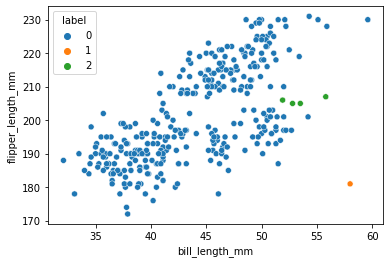

In [561]:
sns.scatterplot(data=X, x='bill_length_mm', y='flipper_length_mm', hue='label');

In [562]:
X = penguins[['bill_length_mm', 'flipper_length_mm']]
scaler = preprocessing.StandardScaler()
X_norm = scaler.fit_transform(X)

cls.fit(X=X_norm)

X['label'] = pd.Categorical(cls.labels_)

/var/folders/mk/632_7fgs4v374qc935pvf9v00000gn/T/ipykernel_70861/858484882.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['label'] = pd.Categorical(cls.labels_)


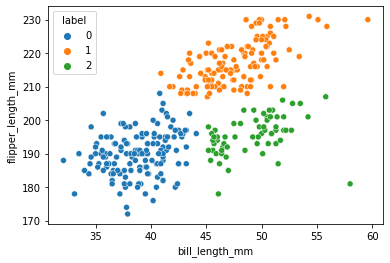

In [563]:
sns.scatterplot(data=X, x='bill_length_mm', y='flipper_length_mm', hue='label');